# EDA - Create combined Dataframe

Import dependencies.

In [1]:
import pandas as pd
import numpy as np
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# import matplotlib.cm as cm
# from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px
# import plotly.subplots as sp
# import plotly.graph_objects as go
# import plotly.io as pio

# Set pandas options
pd.set_option('display.max_columns', None)

## Covid-19 Data

Lets take a look at the **Regional** data.

In [2]:
# Load the json file
with open('../../data/Covid/dpc-covid19-ita-regioni-latest.json') as response:
    regions = json.load(response)

regions

[{'data': '2023-05-04T17:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 92,
  'terapia_intensiva': 4,
  'totale_ospedalizzati': 96,
  'isolamento_domiciliare': 3323,
  'totale_positivi': 3419,
  'variazione_totale_positivi': -47,
  'nuovi_positivi': 131,
  'dimessi_guariti': 650744,
  'deceduti': 3960,
  'casi_da_sospetto_diagnostico': None,
  'casi_da_screening': None,
  'totale_casi': 658123,
  'tamponi': 7483582,
  'casi_testati': 1372234,
  'note': "Il dato ''incremento casi confermati'' è composto da 131 , cioè 76 ''nuovi positivi'' e 55 ''reinfezioni''.",
  'ingressi_terapia_intensiva': 0,
  'note_test': None,
  'note_casi': None,
  'totale_positivi_test_molecolare': 250615,
  'totale_positivi_test_antigenico_rapido': 407508,
  'tamponi_test_molecolare': 2605598,
  'tamponi_test_antigenico_rapido': 4877984,
  'codice_nuts_1': 'ITF',
  'codice_nuts_2': 'ITF1'},
 {'data

Create a dataframe from the `json` file.

In [3]:
# Convert the json file to a dataframe
regions_df = pd.DataFrame(regions)

Lets take a look at the dataframe.

In [4]:
regions_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,92,4,96,3323,3419,-47,131,650744,3960,None,None,658123,7483582,1372234,Il dato ''incremento casi confermati'' è compo...,0,None,None,250615,407508,2605598,4877984,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,26,2,28,8390,8418,1,11,191039,1027,None,None,200484,1341696,404577,Il dato relativo al numero dei “Casi in isolam...,0,None,None,71210,129274,702845,638851,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,108,5,113,718,831,-106,89,632556,3412,None,None,636799,4337111,3371574,None,1,None,None,202620,434179,1916246,2420865,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,174,8,182,19737,19919,0,347,2431492,11889,None,None,2463300,20827201,5408549,None,0,None,None,955713,1507587,9602412,11224789,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,506,18,524,3181,3705,-57,305,2128147,19436,None,None,2151288,19545251,2982360,None,3,None,None,1092316,1058972,10726333,8818918,ITH,ITH5


Translate the column names to English.

In [5]:
# Use a dictionary to rename the columns
regions_df = regions_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'ricoverati_con_sintomi': 'symptons_hospitalised', 'terapia_intensiva': 'in_intensive_care',
    'totale_ospedalizzati': 'hospitalised', 'isolamento_domiciliare': 'home_isolation',
    'totale_positivi': 'positive', 'variazione_totale_positivi': 'variance',
    'nuovi_positivi': 'new_cases', 'dimessi_guariti': 'discharged', 'deceduti': 'deaths',
    'casi_da_sospetto_diagnostico': 'suspected', 'casi_da_screening': 'screened',
    'totale_casi': 'total_cases', 'tamponi': 'swabs', 'casi_testati': 'tested_cases', 'note': 'notes',
    'ingressi_terapia_intensiva': 'intensive_care_entrances', 'note_test': 'test_notes',
    'note_casi': 'cases_notes', 'totale_positivi_test_molecolare': 'molecular_positive',
    'totale_positivi_test_antigenico_rapido': 'antigen_positive', 'tamponi_test_molecolare': 'molecular_swabs',
    'tamponi_test_antigenico_rapido': 'antigen_swabs', 'codice_nuts_1': 'nuts_1_code',
    'codice_nuts_2': 'nuts_2_code', 'codice_nuts_3': 'nuts_3_code'
    })
regions_df.head()

,date,state,reg_code,reg_name,lat,long,symptons_hospitalised,in_intensive_care,hospitalised,home_isolation,positive,variance,new_cases,discharged,deaths,suspected,screened,total_cases,swabs,tested_cases,notes,intensive_care_entrances,test_notes,cases_notes,molecular_positive,antigen_positive,molecular_swabs,antigen_swabs,nuts_1_code,nuts_2_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,92,4,96,3323,3419,-47,131,650744,3960,None,None,658123,7483582,1372234,Il dato ''incremento casi confermati'' è compo...,0,None,None,250615,407508,2605598,4877984,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,26,2,28,8390,8418,1,11,191039,1027,None,None,200484,1341696,404577,Il dato relativo al numero dei “Casi in isolam...,0,None,None,71210,129274,702845,638851,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,108,5,113,718,831,-106,89,632556,3412,None,None,636799,4337111,3371574,None,1,None,None,202620,434179,1916246,2420865,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,174,8,182,19737,19919,0,347,2431492,11889,None,None,2463300,20827201,5408549,None,0,None,None,955713,1507587,9602412,11224789,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,506,18,524,3181,3705,-57,305,2128147,19436,None,None,2151288,19545251,2982360,None,3,None,None,1092316,1058972,10726333,8818918,ITH,ITH5


Create a new dataframe with only the column names required:  
  
- date
- state
- region_code
- lat
- lon
- total_cases
- nuts_1_code
- nuts_2_code

In [6]:
# Drop the columns that are not needed
regions_df2 = regions_df.drop(columns=[
    'symptons_hospitalised', 'in_intensive_care',
    'hospitalised', 'home_isolation', 'positive', 'variance',
    'new_cases', 'discharged', 'deaths', 'suspected', 'screened', 'swabs',
    'tested_cases', 'notes', 'intensive_care_entrances', 'test_notes',
    'cases_notes', 'molecular_positive', 'antigen_positive',
    'molecular_swabs', 'antigen_swabs'
    ])
regions_df2.head()

,date,state,reg_code,reg_name,lat,long,total_cases,nuts_1_code,nuts_2_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,658123,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,200484,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,636799,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,2463300,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,2151288,ITH,ITH5


Lets explore the Regions data.  
  
Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [7]:
regions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         21 non-null     object 
 1   state        21 non-null     object 
 2   reg_code     21 non-null     int64  
 3   reg_name     21 non-null     object 
 4   lat          21 non-null     float64
 5   long         21 non-null     float64
 6   total_cases  21 non-null     int64  
 7   nuts_1_code  21 non-null     object 
 8   nuts_2_code  21 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ KB


Using `.describe()` will help us understand the values in the data.

In [8]:
regions_df2.describe()

,reg_code,lat,long,total_cases
count,21.000000,21.000000,21.000000,2.100000e+01
mean,11.857143,43.046293,12.225955,1.229010e+06
std,6.428730,2.550241,2.724611,1.091577e+06
min,1.000000,38.115697,7.320149,5.080200e+04
25%,7.000000,41.125596,11.121231,4.427560e+05
50%,12.000000,43.616760,12.388247,6.663060e+05
75%,17.000000,45.434905,13.768136,1.825465e+06
max,22.000000,46.499335,16.867367,4.154840e+06


## Conclusion

The data included in the `json` files is the **sum** of Covid-19 cases across 2019 and 2020.  
  
For our analysis we need more granular data.

## CSV Data

### CSV Aggregated Data

The **csv** data is spread across separate files by month.  
  
We can use **os** to open, read, and collate the data into a single dataframe.

In [9]:
# specify the path where the csv files are located
path = '../../data/Covid/dati-regioni/'

In [10]:
# get a list of all the csv files in the folder
files = os.listdir(path)

In [11]:
# create an empty list to store the dataframes
dataframes = []

# loop through each csv file and append its contents to the list of dataframes
for file in files:
    if file.endswith('.csv'):
        filepath = os.path.join(path, file)
        df = pd.read_csv(filepath)
        dataframes.append(df)

# concatenate all the dataframes together
covid_reg = pd.concat(dataframes, ignore_index=True)

Lets take a look at the dataframe.

In [12]:
covid_reg.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid_reg.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
24481,2023-05-04T17:00:00,ITA,19,Sicilia,38.115697,13.362357,178,7,185,6718,6903,-2670,123,1805785,12777,NaN,NaN,1825465,16813433,11152910.0,NaN,0.0,NaN,NaN,539260.0,1286205.0,5432520.0,11380913.0,ITG,ITG1
24482,2023-05-04T17:00:00,ITA,9,Toscana,43.769231,11.255889,177,6,183,4326,4509,119,209,1585312,11709,NaN,NaN,1601530,16787232,5414751.0,NaN,1.0,NaN,NaN,716697.0,884833.0,7091356.0,9695876.0,ITI,ITI1
24483,2023-05-04T17:00:00,ITA,10,Umbria,43.106758,12.388247,91,1,92,901,993,15,89,439276,2487,NaN,NaN,442756,5066170,815991.0,- Si fa presente che 1 dei ricoveri non UTI ap...,0.0,NaN,NaN,159579.0,283177.0,1758331.0,3307839.0,ITI,ITI2
24484,2023-05-04T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,1,0,1,268,269,-5,4,49961,572,NaN,NaN,50802,594314,146773.0,NaN,0.0,NaN,NaN,16259.0,34543.0,145842.0,448472.0,ITC,ITC2
24485,2023-05-04T17:00:00,ITA,5,Veneto,45.434905,12.338452,239,14,253,15908,16161,159,453,2688248,16824,NaN,NaN,2721233,37724639,5324920.0,Nei valori riportati per le terapie intensive ...,0.0,NaN,NaN,1075237.0,1645996.0,11625447.0,26099192.0,ITH,ITH3


### EDA - CSV Aggregated Data

In [14]:
print(f'We have {covid_reg.shape[0]} rows and {covid_reg.shape[1]} columns')

We have 24486 rows and 30 columns


Lets explore the Regional data.  
  
Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [15]:
covid_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24486 entries, 0 to 24485
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    24486 non-null  object 
 1   stato                                   24486 non-null  object 
 2   codice_regione                          24486 non-null  int64  
 3   denominazione_regione                   24486 non-null  object 
 4   lat                                     24486 non-null  float64
 5   long                                    24486 non-null  float64
 6   ricoverati_con_sintomi                  24486 non-null  int64  
 7   terapia_intensiva                       24486 non-null  int64  
 8   totale_ospedalizzati                    24486 non-null  int64  
 9   isolamento_domiciliare                  24486 non-null  int64  
 10  totale_positivi                         24486 non-null  in

There are no `Null` values in the data, we will deal with the `Null` values later.

Using `describe()` will help us understand the numerical values in the data. 
  
Lets only look at the numerical data, excluding the `date`, `codes` and `geo` columns.

In [16]:
covid_reg[[
    'ricoverati_con_sintomi', 'terapia_intensiva',
    'totale_ospedalizzati', 'isolamento_domiciliare',
    'totale_positivi', 'variazione_totale_positivi',
    'nuovi_positivi', 'dimessi_guariti', 'deceduti',
    'casi_da_sospetto_diagnostico', 'casi_da_screening',
    'totale_casi', 'tamponi', 'casi_testati',
    'ingressi_terapia_intensiva', 'totale_positivi_test_molecolare',
    'totale_positivi_test_antigenico_rapido',
    'tamponi_test_molecolare', 'tamponi_test_antigenico_rapido'
    ]].describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,24486.000000,2.448600e+04,24486.000000,3402.000000,3402.00000,2.448600e+04,2.448600e+04,2.333100e+04,18543.000000,1.764000e+04,1.764000e+04,1.764000e+04,1.764000e+04
mean,463.969983,44.780528,508.750510,21598.353345,22107.103610,5.118517,1041.701299,4.431715e+05,5659.167198,16472.772193,6319.39565,4.709378e+05,5.876708e+06,1.797052e+06,2.969638,3.286428e+05,3.147168e+05,3.636032e+06,4.344032e+06
std,871.306552,96.567591,962.934311,41110.278674,41513.129374,2053.651905,2390.960314,7.094805e+05,7844.665291,32188.413270,15054.35195,7.319840e+05,8.522851e+06,2.145636e+06,5.626426,3.482502e+05,4.868369e+05,3.669912e+06,5.881339e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,-50797.000000,-229.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,3.482000e+03,-2.000000,7.382000e+03,0.000000e+00,6.615200e+04,0.000000e+00
25%,50.000000,3.000000,55.000000,1117.250000,1228.250000,-94.000000,51.000000,1.656300e+04,690.000000,2052.250000,117.00000,2.676975e+04,4.651948e+05,2.962550e+05,0.000000,7.012275e+04,1.341750e+03,8.764492e+05,4.172398e+05
50%,180.000000,13.000000,195.000000,6248.500000,6505.500000,2.000000,255.000000,1.162020e+05,2568.000000,5290.500000,1493.00000,1.476730e+05,2.369642e+06,8.715680e+05,1.000000,2.021700e+05,7.222150e+04,2.195741e+06,2.100065e+06
75%,498.000000,41.000000,540.000000,22905.000000,23701.250000,116.000000,998.750000,4.775922e+05,8307.750000,19285.750000,5469.00000,5.118028e+05,6.905588e+06,2.585904e+06,3.000000,4.925005e+05,3.886198e+05,5.062436e+06,5.293302e+06
max,12077.000000,1381.000000,13328.000000,574548.000000,578257.000000,47483.000000,52693.000000,4.106068e+06,45898.000000,305002.000000,113150.00000,4.154840e+06,4.558697e+07,1.115291e+07,86.000000,1.539511e+06,2.615329e+06,1.709782e+07,2.848915e+07


Lets explore the column names with a view to dropping any columns that are not required.

In [17]:
covid_reg.columns.tolist()

['data',
 'stato',
 'codice_regione',
 'denominazione_regione',
 'lat',
 'long',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'note',
 'ingressi_terapia_intensiva',
 'note_test',
 'note_casi',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'codice_nuts_1',
 'codice_nuts_2']

Lets remove the columns that are not required.

In [18]:
# Drop the columns that are not needed
covid_reg.drop([
    'ricoverati_con_sintomi',
    'terapia_intensiva',
    'totale_ospedalizzati',
    'isolamento_domiciliare',
    'totale_positivi',
    'variazione_totale_positivi',
    'nuovi_positivi',
    'dimessi_guariti',
    'deceduti',
    'casi_da_sospetto_diagnostico',
    'casi_da_screening',
    'tamponi',
    'casi_testati',
    'note',
    'ingressi_terapia_intensiva',
    'note_test',
    'note_casi',
    'totale_positivi_test_molecolare',
    'totale_positivi_test_antigenico_rapido',
    'tamponi_test_molecolare',
    'tamponi_test_antigenico_rapido',
    'codice_nuts_1',
    'codice_nuts_2'], axis=1, inplace=True)
covid_reg

,data,stato,codice_regione,denominazione_regione,lat,long,totale_casi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18
...,...,...,...,...,...,...,...
24481,2023-05-04T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825465
24482,2023-05-04T17:00:00,ITA,9,Toscana,43.769231,11.255889,1601530
24483,2023-05-04T17:00:00,ITA,10,Umbria,43.106758,12.388247,442756
24484,2023-05-04T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50802


We can now translate the column names to English.

In [19]:
# Use a dictionary to rename the columns
covid_reg = covid_reg.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'long': 'lon', 'totale_casi': 'total_cases'
    })
covid_reg.head()

,date,state,reg_code,reg_name,lat,lon,total_cases
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18


Convert `date` column to `Datetime` format.

In [20]:
covid_reg['date'] = pd.to_datetime(covid_reg['date'])

The data is on a daily basis. To make the data more manageable we can group the data by year and month.

In [21]:
# Create a year and month column
covid_reg['year'] = pd.to_datetime(covid_reg['date']).dt.year
covid_reg['month'] = pd.to_datetime(covid_reg['date']).dt.month
covid_reg['week'] = pd.to_datetime(covid_reg['date']).dt.isocalendar().week
covid_reg['day_of_week'] = pd.to_datetime(covid_reg['date']).dt.dayofweek
covid_reg

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week,day_of_week
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,0
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,0
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,0
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18,2020,2,9,0
...,...,...,...,...,...,...,...,...,...,...,...
24481,2023-05-04 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825465,2023,5,18,3
24482,2023-05-04 17:00:00,ITA,9,Toscana,43.769231,11.255889,1601530,2023,5,18,3
24483,2023-05-04 17:00:00,ITA,10,Umbria,43.106758,12.388247,442756,2023,5,18,3
24484,2023-05-04 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50802,2023,5,18,3


Lets check the total number of cases.  
  
We can do this by grouping the `date` and summing the `total_cases`.

In [35]:
end_date = '04-05-2023'
covid_total = covid_reg.loc[covid_reg['date'] == '2023-05-04 17:00:00', 'total_cases'].sum()
print(f'As of {end_date}, the total number of cases in Italy was {covid_total:,}.')

As of 04-05-2023, the total number of cases in Italy was 25,809,208.


In [98]:
def plot_covid_regions(df, year, day_of_week=3):
    # Create a dictionary that maps numbers to day names
    day_mapping = {
        1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
        4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

    # Get unique region names
    regions = df['reg_name'].unique()

    # Create a new figure
    fig = go.Figure()

    # Create a temporary dataframe and map day_of_week to day name
    df_temp = df.copy()
    df_temp['day_of_week'] = df_temp['day_of_week'].map(day_mapping)

    # For each region, filter the data and add to the plot
    for region in regions:
        df_region = df_temp[
            (df_temp['reg_name'] == region) &
            (df_temp['year'] == year) &
            (df_temp['day_of_week'] == day_mapping[day_of_week])
        ]
        fig.add_trace(go.Scatter(
            x=df_region['date'], y=df_region['total_cases'], 
            mode='lines', name=region))

    # Set plot layout
    fig.update_layout(
        title=f'Total Cases on {day_mapping[day_of_week]}s by month in {year}',
        xaxis_title="Date",
        yaxis_title="Total Cases",
        legend_title="Regions",
        width=1200,
        height=800,
        font=dict(
            family="Arial",
            size=18,
            # color="Blue"
        )
    )

    # Show the plot
    fig.show()

In [99]:
plot_covid_regions(covid_reg, 2020)

In [50]:
def filter_covid(df, region, year, day_of_week):
    return df[
        (df['reg_name'] == region) &
        (df['year'] == year) &
        (df['day_of_week'] == day_of_week)
        ].plot(
            x='date', y='total_cases',
            figsize=(12, 8),
            title='Total Cases in Veneto on Mondays in 2020', grid=True)

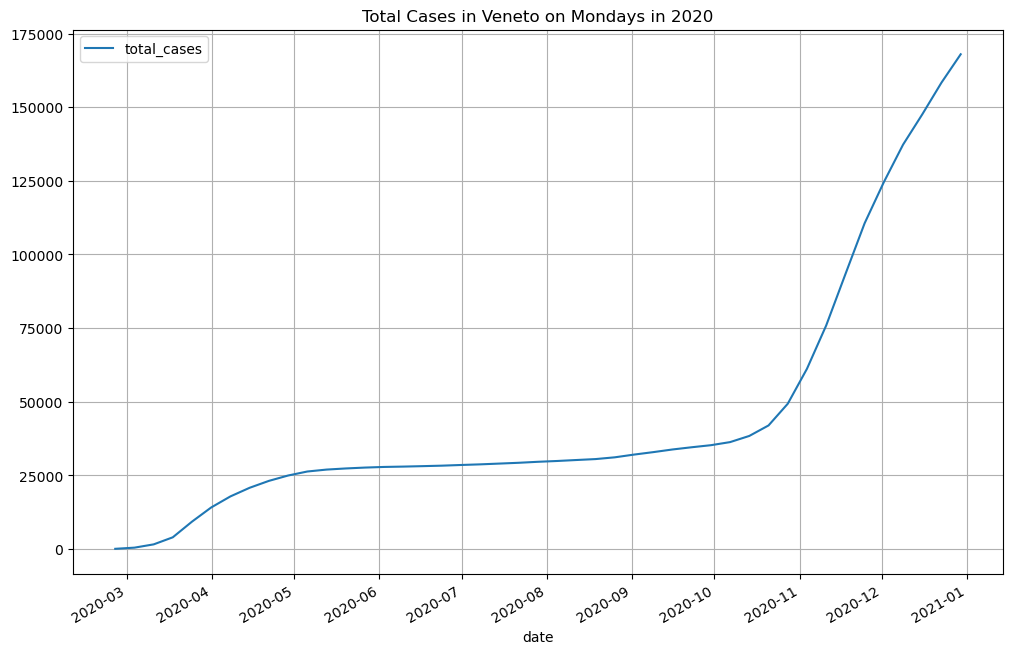

In [52]:
filter_covid(covid_reg, 'Emilia-Romagna', 2020, 1);

In [46]:
covid_reg_mon = covid_reg[covid_reg['day_of_week'] == 1]
covid_reg_mon

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week,day_of_week
21,2020-02-25 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,1
22,2020-02-25 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,1
23,2020-02-25 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,1
24,2020-02-25 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,1
25,2020-02-25 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,26,2020,2,9,1
...,...,...,...,...,...,...,...,...,...,...,...
24439,2023-05-02 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825175,2023,5,18,1
24440,2023-05-02 17:00:00,ITA,9,Toscana,43.769231,11.255889,1600998,2023,5,18,1
24441,2023-05-02 17:00:00,ITA,10,Umbria,43.106758,12.388247,442540,2023,5,18,1
24442,2023-05-02 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50791,2023,5,18,1


In [66]:
date1 = datetime(2020,2,24)
date2 = datetime(2021,12,31)
covid_reg_dates = covid_reg_mon[(covid_reg_mon['date'] >= date1) & (covid_reg_mon['date'] <= date2)].reset_index(drop=True)

In [67]:
covid_reg_dates

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week,day_of_week
0,2020-02-25 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,1
1,2020-02-25 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,1
2,2020-02-25 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,1
3,2020-02-25 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,1
4,2020-02-25 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,26,2020,2,9,1
...,...,...,...,...,...,...,...,...,...,...,...
4069,2021-12-28 17:00:00,ITA,19,Sicilia,38.115697,13.362357,359315,2021,12,52,1
4070,2021-12-28 17:00:00,ITA,9,Toscana,43.769231,11.255889,341579,2021,12,52,1
4071,2021-12-28 17:00:00,ITA,10,Umbria,43.106758,12.388247,79749,2021,12,52,1
4072,2021-12-28 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,15317,2021,12,52,1


In [68]:
df_cases_sum = pd.DataFrame(covid_reg_dates[['reg_name', 'reg_code', 'total_cases']])
df_cases_sum

,reg_name,reg_code,total_cases
0,Abruzzo,13,0
1,Basilicata,17,0
2,Calabria,18,0
3,Campania,15,0
4,Emilia-Romagna,8,26
...,...,...,...
4069,Sicilia,19,359315
4070,Toscana,9,341579
4071,Umbria,10,79749
4072,Valle d'Aosta,2,15317


In [69]:
def get_total_cases_sum(covid_reg, reg_name, year, month):
    df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year) & (covid_reg['month'] == month)]
    total_cases_sum = df['total_cases'].sum()
    return total_cases_sum

In [70]:
get_total_cases_sum(covid_reg, 'Veneto', 2020, 12)

12450454

In [26]:
# sort the values by data
# covid_reg.sort_values(by = ['date'], inplace=True)

In [27]:
covid_reg.head()

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week,day_of_week
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,0
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9,0
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,0
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,0
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18,2020,2,9,0


In [28]:
crime_url = '../../data/crime_type_by_year_cleaned.csv'

In [29]:
crime_df = pd.read_csv(crime_url, index_col=0)

In [30]:
crime_df.head()

,Territory_Code,Territory_Name,REATIPS_VICES,Crime_Type,Year,Number_of_Crime
0,IT,Italy,MASSMURD,mass murder,2017,17
1,IT,Italy,MASSMURD,mass murder,2018,20
2,IT,Italy,MASSMURD,mass murder,2019,14
3,IT,Italy,MASSMURD,mass murder,2020,29
4,IT,Italy,MASSMURD,mass murder,2021,29


In [31]:
crime_df.shape

(36984, 6)

In [32]:
crime_df.columns = crime_df.columns.str.strip(
    ).str.lower(
        ).str.replace(
            '-', '_', regex=False).str.replace('(', '', regex=False).str.replace(')', '', regex=False)
crime_df.head()

,territory_code,territory_name,reatips_vices,crime_type,year,number_of_crime
0,IT,Italy,MASSMURD,mass murder,2017,17
1,IT,Italy,MASSMURD,mass murder,2018,20
2,IT,Italy,MASSMURD,mass murder,2019,14
3,IT,Italy,MASSMURD,mass murder,2020,29
4,IT,Italy,MASSMURD,mass murder,2021,29


In [33]:
len(crime_df['territory_name'].unique())

133

In [34]:
len(crime_df['crime_type'].unique())

56

In [35]:
len(crime_df[crime_df['crime_type'] == 'total'])

670

In [36]:
crime_totals = crime_df[(crime_df['crime_type'] == 'total') & (crime_df['year'] == 2020)]
crime_totals

,territory_code,territory_name,reatips_vices,crime_type,year,number_of_crime
274,IT,Italy,TOT,total,2020,1900624
550,ITC,Nord-ovest,TOT,total,2020,544793
826,ITC1,Piemonte,TOT,total,2020,147640
1102,ITC11,Torino,TOT,total,2020,95335
1378,ITC12,Vercelli,TOT,total,2020,4009
...,...,...,...,...,...,...
35628,ITG17,Catania,TOT,total,2020,36494
36034,ITG12,Palermo,TOT,total,2020,39006
36349,ITG13,Messina,TOT,total,2020,16180
36454,ITG11,Trapani,TOT,total,2020,13585


Fix some of the place name values.

In [37]:
crime_totals.loc[:, 'territory_name'] = crime_totals['territory_name'].str.replace(' / ', '/', regex=False)

In [38]:
crime_totals[crime_totals['territory_name'] == "Valle d'Aosta/Vallée d'Aoste"]

,territory_code,territory_name,reatips_vices,crime_type,year,number_of_crime
3310,ITC2,Valle d'Aosta/Vallée d'Aoste,TOT,total,2020,3197
3586,ITC20,Valle d'Aosta/Vallée d'Aoste,TOT,total,2020,3197


In [39]:
reg_sim_url ='../../data/geo_data/regions_simplified.geojson'

In [40]:
with open(reg_sim_url) as f:
    geojson_reg = json.load(f)

In [41]:
geo = pd.json_normalize(geojson_reg['features'])
geo['region_name'] = geo['properties.reg_name']

In [42]:
geo

,type,geometry.type,geometry.coordinates,properties.reg_name,properties.reg_istat_code_num,properties.reg_istat_code,region_name
0,Feature,Polygon,"[[[7.104329571840417, 45.46695875661557], [7.1...",Piemonte,1,01,Piemonte
1,Feature,Polygon,"[[[7.864048284549529, 45.91643936466997], [7.8...",Valle d'Aosta/Vallée d'Aoste,2,02,Valle d'Aosta/Vallée d'Aoste
2,Feature,Polygon,"[[[8.714815174881677, 46.098042790817374], [8....",Lombardia,3,03,Lombardia
3,Feature,Polygon,"[[[10.840150465662777, 45.83275599772702], [10...",Trentino-Alto Adige/Südtirol,4,04,Trentino-Alto Adige/Südtirol
4,Feature,Polygon,"[[[10.840150465662777, 45.83275599772702], [10...",Veneto,5,05,Veneto
5,Feature,Polygon,"[[[13.780444275993942, 45.61214651670894], [13...",Friuli-Venezia Giulia,6,06,Friuli-Venezia Giulia
6,Feature,MultiPolygon,"[[[[7.714329727043176, 44.061558889222994], [7...",Liguria,7,07,Liguria
7,Feature,Polygon,"[[[11.42674203208362, 44.950083525538574], [11...",Emilia-Romagna,8,08,Emilia-Romagna
8,Feature,MultiPolygon,"[[[[9.686700448591356, 44.36593956716987], [9....",Toscana,9,09,Toscana
9,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Umbria,10,10,Umbria


In [53]:
df_cases_sum = df_cases_sum.groupby(['reg_code']).max().reset_index()

In [54]:
df_cases_sum

,reg_code,reg_name,total_cases
0,1,Piemonte,483268
1,2,Valle d'Aosta,15841
2,3,Lombardia,1175906
3,5,Veneto,636695
4,6,Friuli Venezia Giulia,153733
5,7,Liguria,146640
6,8,Emilia-Romagna,526757
7,9,Toscana,364713
8,10,Umbria,86248
9,11,Marche,143385


In [ ]:
df_cases_sum = df_geo.merge(df_geo_sum, left_on='properties.reg_istat_code_num', right_on='reg_code')
df_cases_sum.rename(columns={'total_cases': 'total_cases_covid'}, inplace=True)
df_cases_sum

,type,geometry.type,geometry.coordinates,properties.reg_name,properties.reg_istat_code_num,properties.reg_istat_code,reg_code,reg_name,total_cases_covid
0,Feature,Polygon,"[[[7.104329571840417, 45.46695875661557], [7.1...",Piemonte,1,01,1,Piemonte,454149
1,Feature,Polygon,"[[[7.864048284549529, 45.91643936466997], [7.8...",Valle d'Aosta/Vallée d'Aoste,2,02,2,Valle d'Aosta,15064
2,Feature,Polygon,"[[[8.714815174881677, 46.098042790817374], [8....",Lombardia,3,03,3,Lombardia,1075263
3,Feature,Polygon,"[[[10.840150465662777, 45.83275599772702], [10...",Veneto,5,05,5,Veneto,610250
4,Feature,Polygon,"[[[13.780444275993942, 45.61214651670894], [13...",Friuli-Venezia Giulia,6,06,6,Friuli Venezia Giulia,149079
5,Feature,MultiPolygon,"[[[[7.714329727043176, 44.061558889222994], [7...",Liguria,7,07,7,Liguria,142079
6,Feature,Polygon,"[[[11.42674203208362, 44.950083525538574], [11...",Emilia-Romagna,8,08,8,Emilia-Romagna,512130
7,Feature,MultiPolygon,"[[[[9.686700448591356, 44.36593956716987], [9....",Toscana,9,09,9,Toscana,337126
8,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Umbria,10,10,10,Umbria,77032
9,Feature,Polygon,"[[[12.21815932729924, 43.60349796025912], [12....",Marche,11,11,11,Marche,138766


In [ ]:
df_cas_cri_sum = df_cases_sum.merge(crime_totals, left_on='properties.reg_name', right_on='territory_name')
df_cas_cri_sum.rename(columns={'total_cases': 'total_cases_covid'}, inplace=True)
df_cas_cri_sum

,type,geometry.type,geometry.coordinates,properties.reg_name,properties.reg_istat_code_num,properties.reg_istat_code,reg_code,reg_name,total_cases_covid,territory_code,territory_name,reatips_vices,crime_type,year,number_of_crime
0,Feature,Polygon,"[[[7.104329571840417, 45.46695875661557], [7.1...",Piemonte,1,01,1,Piemonte,454149,ITC1,Piemonte,TOT,total,2020,147640
1,Feature,Polygon,"[[[8.714815174881677, 46.098042790817374], [8....",Lombardia,3,03,3,Lombardia,1075263,ITC4,Lombardia,TOT,total,2020,337406
2,Feature,Polygon,"[[[10.840150465662777, 45.83275599772702], [10...",Veneto,5,05,5,Veneto,610250,ITD3,Veneto,TOT,total,2020,133160
3,Feature,Polygon,"[[[13.780444275993942, 45.61214651670894], [13...",Friuli-Venezia Giulia,6,06,6,Friuli Venezia Giulia,149079,ITD4,Friuli-Venezia Giulia,TOT,total,2020,29016
4,Feature,MultiPolygon,"[[[[7.714329727043176, 44.061558889222994], [7...",Liguria,7,07,7,Liguria,142079,ITC3,Liguria,TOT,total,2020,56550
5,Feature,Polygon,"[[[11.42674203208362, 44.950083525538574], [11...",Emilia-Romagna,8,08,8,Emilia-Romagna,512130,ITD5,Emilia-Romagna,TOT,total,2020,166883
6,Feature,MultiPolygon,"[[[[9.686700448591356, 44.36593956716987], [9....",Toscana,9,09,9,Toscana,337126,ITE1,Toscana,TOT,total,2020,128010
7,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Umbria,10,10,10,Umbria,77032,ITE2,Umbria,TOT,total,2020,25437
8,Feature,Polygon,"[[[12.21815932729924, 43.60349796025912], [12....",Marche,11,11,11,Marche,138766,ITE3,Marche,TOT,total,2020,34588
9,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Lazio,12,12,12,Lazio,481418,ITE4,Lazio,TOT,total,2020,219485


In [ ]:
df_cas_cri_sum.drop(2, inplace=True)
df_cas_cri_sum.reset_index(drop=True, inplace=True)

NameError: name 'df_cas_cri_sum' is not defined

In [ ]:
df_cas_cri_sum

,type,geometry.type,geometry.coordinates,properties.reg_name,properties.reg_istat_code_num,properties.reg_istat_code,reg_code,reg_name,total_cases_covid,territory_code,territory_name,reatips_vices,crime_type,year,number_of_crime
0,Feature,Polygon,"[[[7.104329571840417, 45.46695875661557], [7.1...",Piemonte,1,01,1,Piemonte,454149,ITC1,Piemonte,TOT,total,2020,147640
1,Feature,Polygon,"[[[8.714815174881677, 46.098042790817374], [8....",Lombardia,3,03,3,Lombardia,1075263,ITC4,Lombardia,TOT,total,2020,337406
3,Feature,Polygon,"[[[13.780444275993942, 45.61214651670894], [13...",Friuli-Venezia Giulia,6,06,6,Friuli Venezia Giulia,149079,ITD4,Friuli-Venezia Giulia,TOT,total,2020,29016
4,Feature,MultiPolygon,"[[[[7.714329727043176, 44.061558889222994], [7...",Liguria,7,07,7,Liguria,142079,ITC3,Liguria,TOT,total,2020,56550
5,Feature,Polygon,"[[[11.42674203208362, 44.950083525538574], [11...",Emilia-Romagna,8,08,8,Emilia-Romagna,512130,ITD5,Emilia-Romagna,TOT,total,2020,166883
6,Feature,MultiPolygon,"[[[[9.686700448591356, 44.36593956716987], [9....",Toscana,9,09,9,Toscana,337126,ITE1,Toscana,TOT,total,2020,128010
7,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Umbria,10,10,10,Umbria,77032,ITE2,Umbria,TOT,total,2020,25437
8,Feature,Polygon,"[[[12.21815932729924, 43.60349796025912], [12....",Marche,11,11,11,Marche,138766,ITE3,Marche,TOT,total,2020,34588
9,Feature,MultiPolygon,"[[[[11.894963940648156, 42.83466879407358], [1...",Lazio,12,12,12,Lazio,481418,ITE4,Lazio,TOT,total,2020,219485
10,Feature,Polygon,"[[[13.94101515669948, 41.68797275723309], [14....",Abruzzo,13,13,13,Abruzzo,97017,ITF1,Abruzzo,TOT,total,2020,34250


In [ ]:
# sort the data for plotly reading
date1 = datetime(2020,2,24)
date2 = datetime(2021,12,31)
covid_reg_dates = covid_reg_mon[(covid_reg_mon['date'] >= date1) & (covid_reg_mon['date'] <= date2)]

In [ ]:
fig = px.scatter_mapbox(
    covid_reg_dates, lat='lat', lon='lon', color='total_cases',
    hover_name='reg_name', hover_data=['month', 'year', 'total_cases'],
    zoom=5, height=850, width=1000,
    animation_frame='date', size='total_cases', size_max=100,
    animation_group='reg_name',
    labels={'total_cases': 'Covid-19 Cases',  'date': 'Covid-19 Cases by Week - 2020 to 2021 '},
)

# You can adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':35, 'l':15, 'b':10}, 
    mapbox=dict(pitch=60, bearing=30), # Cool map view, set if required
    title='Covid-19 Cases in Italy by Region',
)

# Set Map Centre
fig.update_mapboxes(
    center_lat=42.000,
    center_lon=12.706
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100  # Set the frame duration (adjust as needed)
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 400 # Set the transition duration (adjust as needed)

fig.write_html('scatter_mapbox.html')

fig.show()

In [ ]:
df_geo.head(1)

,type,geometry.type,geometry.coordinates,properties.reg_name,properties.reg_istat_code_num,properties.reg_istat_code
0,Feature,Polygon,"[[[7.104329571840417, 45.46695875661557], [7.1...",Piemonte,1,01


In [ ]:
fig = px.choropleth_mapbox(df_geo_cases, geojson=geojson_reg, featureidkey='properties.reg_istat_code',
                        locations='properties.reg_istat_code', color='total_cases',
                        color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                        mapbox_style='carto-positron', zoom=4.5, opacity=0.8)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [ ]:
# Create the choropleth map
fig = px.choropleth_mapbox(df_geo_cases, geojson=geojson_reg, featureidkey='properties.reg_istat_code',
                        locations='properties.reg_istat_code', color='total_cases',
                        color_discrete_sequence=px.colors.qualitative.Dark24, center={'lon': 12.5, 'lat': 41.9},
                        mapbox_style='open-street-map', zoom=4.5, opacity=0.8)

# Create the scatter map
scatter_trace = px.scatter_mapbox(covid_reg, lat='lat', lon='lon', 
                                  hover_name='reg_name', hover_data=['month', 'year', 'total_cases'],
                                  color_discrete_sequence=['red'], zoom=5, height=750, width=1000,
                                  animation_frame='date', size='size', size_max=100,
                                  animation_group='total_cases').data[0]

# Add scatter map trace to the choropleth map
fig.add_trace(scatter_trace)

# Adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':0, 'l':0, 'b':0}, 
    mapbox=dict(pitch=60, bearing=30)
    )

fig.update_traces(marker=dict(sizemin=10))  # Set the minimum marker size

fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['type', 'geometry.type', 'geometry.coordinates', 'properties.reg_name', 'properties.reg_istat_code_num', 'properties.reg_istat_code', 'reg_code', 'reg_name', 'total_cases_covid'] but received: total_cases

In [ ]:
# Modify the size column in the DataFrame
covid_reg['size'] = covid_reg['total_cases']

fig = px.scatter_mapbox(covid_reg, lat='lat', lon='lon', 
                        hover_name='reg_name', hover_data=['month', 'year', 'total_cases'],
                        color_discrete_sequence=['red'], zoom=5, height=750, width=1000,
                        animation_frame='date', size='size', size_max=100,
                        animation_group='total_cases')

# You can adjust the map view
fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r':0, 't':0, 'l':0, 'b':0}, 
    mapbox=dict(pitch=60, bearing=30)
    )

fig.update_traces(marker=dict(sizemin=10))  # Set the minimum marker size

fig.update_geos(projection_type='equirectangular', visible=True, resolution=110)

# fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100  # Set the frame duration (adjust as needed)

fig.write_html('scatter_mapbox.html')

fig.show()

print(fig.layout)
print(fig.data)
print(fig.frames)

In [ ]:
start_size = 5  # Define the start size for the markers

# Modify the size column in the DataFrame
covid_reg['size'] = covid_reg['total_cases'] + start_size

fig = px.scatter_mapbox(covid_reg, lat="lat", lon="lon", 
                        hover_name="date", hover_data=["month", "year", "total_cases"],
                        color_discrete_sequence=["red"], zoom=5, height=750, width=700,
                        animation_frame="day_of_week", size="size", size_max=10,
                        animation_group="total_cases", range_color=[covid_reg['total_cases'].min(), covid_reg['total_cases'].max()])

fig.update_layout(mapbox_style="open-street-map")
# You can adjust the map view
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}, 
                  mapbox=dict(pitch=60, bearing=30))

fig.update_traces(marker=dict(sizemin=1))  # Set the minimum marker size

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100  # Set the frame duration (adjust as needed)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set up map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND, color='lightgray')

# Retrieve latitude and longitude coordinates from the dataframe
latitudes = covid_reg['lat'].values
longitudes = covid_reg['lon'].values

# Calculate the range of latitudes and longitudes
min_lat, max_lat = latitudes.min(), latitudes.max()
min_lon, max_lon = longitudes.min(), longitudes.max()

# Create a grid for the map
x = np.linspace(min_lon, max_lon, 360)
y = np.linspace(min_lat, max_lat, 180)
X, Y = np.meshgrid(x, y)

def update_plot(index):
    ax.clear()

    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[index]
    year = unique_combinations['year'].iloc[index]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['total_cases'].sum()

    # Create a grid of total cases for each point on the map
    cases_grid = np.zeros_like(X)
    latitudes = filtered_df['lat'].values
    longitudes = filtered_df['lon'].values
    for lat, lon in zip(latitudes, longitudes):
        lat_index = int((lat - min_lat) / (max_lat - min_lat) * 179)
        lon_index = int((lon - min_lon) / (max_lon - min_lon) * 359)
        cases_grid[lat_index, lon_index] = total_cases_sum

    # Plotting the map with total cases data
    ax.imshow(cases_grid, extent=[min_lon, max_lon, min_lat, max_lat], origin='lower', cmap='Reds', vmin=0, vmax=cases_grid.max())

    # Setting plot title
    ax.set_title(f'Total Cases - Year {year}')

animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

# Assign the animation to a variable
anim = animation

# Display the animation
plt.show()



In [ ]:
plot_time_series(covid_reg)

In [ ]:
def update_plot(frame):
    ax.clear()
    
    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[frame]
    year = unique_combinations['year'].iloc[frame]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['total_cases'].sum()

    # Plotting
    plt.bar(reg_name, total_cases_sum)
    plt.xlabel('Region')
    plt.ylabel('Total Cases')
    plt.title(f'Total Cases - Year {year}')
    plt.xticks(rotation=45)

fig, ax = plt.subplots()
animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

plt.show()


In [ ]:
covid_reg.describe()

In [ ]:
covid_reg.groupby('reg_name', as_index=False).agg({'total_cases': 'max'})

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='total_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, df['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = df['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Covid 19 Cases by Region", "Region with Highest Cases"))

# Add the bar chart to the first subplot
fig.add_trace(go.Bar(x=df2['reg_name'], y=df2['total_cases'], name='Covid Cases'), row=1, col=1)
fig.update_xaxes(title_text='Italian Regions', tickangle=-45, row=1, col=1)
fig.update_yaxes(title_text='Covid Cases', tickformat=',.0f', row=1, col=1)

# Find the region with the highest total_cases
region_highest_cases = df2.loc[df2['total_cases'].idxmax(), 'reg_name']

# Add the choropleth map to the second subplot
fig.add_trace(px.choropleth_mapbox(df2, geojson=regions, locations='reg_name', color='total_cases',
                                    color_continuous_scale='Blues', mapbox_style='carto-positron',
                                    hover_name='reg_name', hover_data={'total_cases': ':,'},
                                    title=f'Region with Highest Cases: {region_highest_cases}').data[0], row=1, col=2)

fig.update_layout(height=600, showlegend=False)

fig.show()

In [ ]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            # set labels names
            labels={'reg_name': 'Italian Regions', 'total_cases': 'Covid Cases'})
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
regions_df.head(1)

In [ ]:
df2.head(1)

In [ ]:
df3 = df2.rename(columns={'reg_name': 'denominazione_regione'})
df3

In [ ]:
# Find the region with the highest total_cases
region_highest_cases = df3.loc[df3['total_cases'].idxmax(), 'denominazione_regione']

# Create the bar chart
fig = px.bar(df3, x='denominazione_regione', y='total_cases', title='Covid 19 Cases by Region',
            labels={'denominazione_regione': 'Italian Regions', 'total_cases': 'Covid Cases'})
fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',.0f')

# Create the choropleth map trace
map_trace = go.Choroplethmapbox(
    geojson=regions,  # Replace with the correct GeoJSON data for Italian regions
    locations=df3['denominazione_regione'],
    z=df3['total_cases'],
    colorscale='Blues',
    zmin=0,
    zmax=df3['total_cases'].max(),
    featureidkey='properties.denominazione_regione',  # Specify the property key in the GeoJSON data
    marker_opacity=0.7,
    hovertemplate='<b>%{location}</b><br>Total Cases: %{z:,.0f}',
    colorbar=dict(title='Covid Cases')
)

# Set the layout for the figure
layout = go.Layout(
    title=f'Region with Highest Cases: {region_highest_cases}',
    mapbox=dict(
        center=dict(lat=42.5, lon=12.5),
        zoom=4.5,
        style='carto-positron'
    ),
    height=500
)

# Create the figure and add the map trace
fig_map = go.Figure(data=map_trace, layout=layout)

# Display the figure
fig_map.show()

In [ ]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            # Change colors using color_discrete_sequence
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'],
            # set labels names
            labels={'reg_name': 'Italian Regions', 'total_cases': 'Covid Cases'},
            # Change hover text with new list
            hover_data={'total_cases': ':.2f'})

# set marker line width and color
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
# set marker angle and opacity
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    )
fig.show()

In [ ]:
sns.boxplot(data=df2, x='total_cases')
plt.title('Boxplot of Column Name')

#### Convert date column to `datetime` type

In [ ]:
regions_df2['date'] = pd.to_datetime(regions_df2['date']).dt.date

Lets create two new columns, **month** and **year**.

In [ ]:
regions_df2['year'] = pd.to_datetime(df['date']).dt.year
regions_df2['month'] = pd.to_datetime(df['date']).dt.month
regions_df2

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='total_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, regions_df2['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = regions_df2['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
fig = px.bar(regions_df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(regions_df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'},
            hover_data={'total_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
sns.boxplot(data=regions_df2, x='total_cases')
plt.title('Boxplot of Column Name')

Lets take a look at the **Province** data.

In [ ]:
with open('../../data/Covid/dpc-covid19-ita-province-latest.json') as response:
    provinces = json.load(response)

provinces

Create a dataframe from the `json` file.

In [ ]:
provs_df = pd.DataFrame(provinces)

In [ ]:
provs_df.head()

Translate the column names to English.

In [ ]:
provs_df = provs_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'codice_provincia': 'prov_code', 'denominazione_provincia': 'prov_name', 'sigla_provincia': 'prov_abr',
    'totale_casi': 'total_cases', 'note': 'notes', 'codice_nuts_1': 'nuts_1_code',
    'codice_nuts_2': 'nuts_2_code', 'codice_nuts_3': 'nuts_3_code'
    })
provs_df.head()

Create a new dataframe with only the column names required:  
  
- date
- state
- region_code
- province_code
- province
- lat
- lon
- total_cases
- nuts_1_code
- nuts_2_code
- nuts_3_code

In [ ]:
provs_df2 = provs_df.drop(columns=[
    'prov_abr', 'notes',
    ])
provs_df2.head()

In [ ]:
provs_covid = provs_df2.drop_duplicates(subset=['prov_code','prov_name'])
provs_covid.to_csv('../../data/Covid/covid-provinces.csv', index=False)

In [ ]:
provs_df2.info()

In [ ]:
provs_df2.describe()

In [ ]:
provs_df2['date'] = pd.to_datetime(provs_df2['date']).dt.date

In [ ]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# select top 20 provinces by total cases and plot bar chart with updated color palette
top_provs = provs_df2.nlargest(20, 'total_cases')
sns.barplot(data=top_provs, x='prov_name', y='total_cases', ax=ax, palette='crest')

# set title and axis labels
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

In [ ]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=top_provs, x='prov_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, top_provs['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = top_provs['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [ ]:
fig = px.bar(top_provs, x='prov_name', y='total_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(top_provs, x='prov_name', y='total_cases', title='Covid 19 Cases by Region',
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'},
            hover_data={'total_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [ ]:
sns.boxplot(data=provs_df2, x='total_cases')
plt.title('Boxplot of Column Name')